In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Step 2: Load the dataset
# Example: dataset.csv contains geological formations data with CO2 storage potential
df = pd.read_csv('../stor_cap/co2_storage_1000.csv')

# Step 3: Define features and target
X = df.drop('CO2_Storage_Potential_Mt', axis=1)  # Features
y = df['CO2_Storage_Potential_Mt']  # Target variable (CO2 storage potential)

# Step 4: Preprocess categorical and numerical data
numerical_features = ['Depth_m', 'Pressure_MPa', 'Porosity_Percent', 'Permeability_mD','Temperature_C']
#categorical_features = ['Formation_Type']

numerical_transformer = StandardScaler()
#categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features)])

# Step 5: Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 9: Hyperparameter Tuning (Optional)
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [10, 20, None]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Mean Squared Error: 1014.4471698951091
R² Score: -0.12844861948099906
Best hyperparameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 500}


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [17]:
df = pd.read_csv('../stor_cap/co2_storage_1000.csv')

# Display the first few rows
df.head()

,Depth_m,Porosity_Percent,Permeability_mD,Pressure_MPa,Temperature_C,CO2_Storage_Potential_Mt
0,2126,12.867671,291.777620,12.988229,53.347790,161.259047
1,2459,11.155952,287.009131,23.353225,68.249585,190.777803
2,1860,19.735679,141.403742,14.311144,58.431493,238.638036
3,2294,6.680584,74.275785,15.516790,55.204882,154.719670
4,2130,10.967834,170.894054,10.871379,61.392546,246.141662


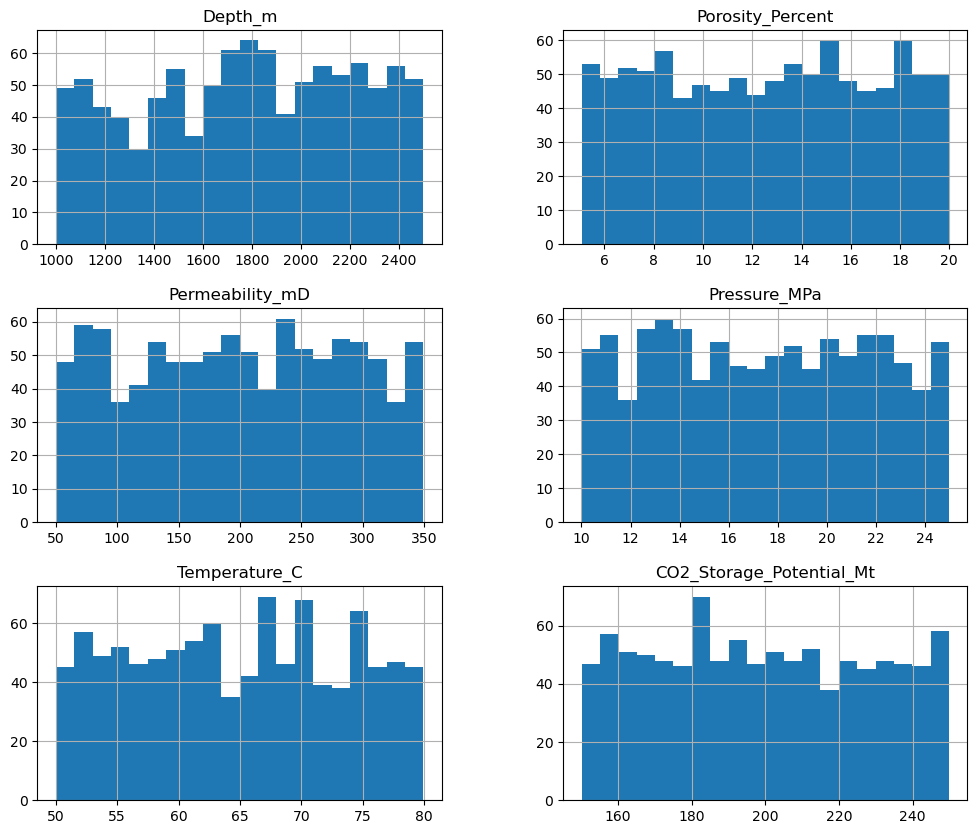

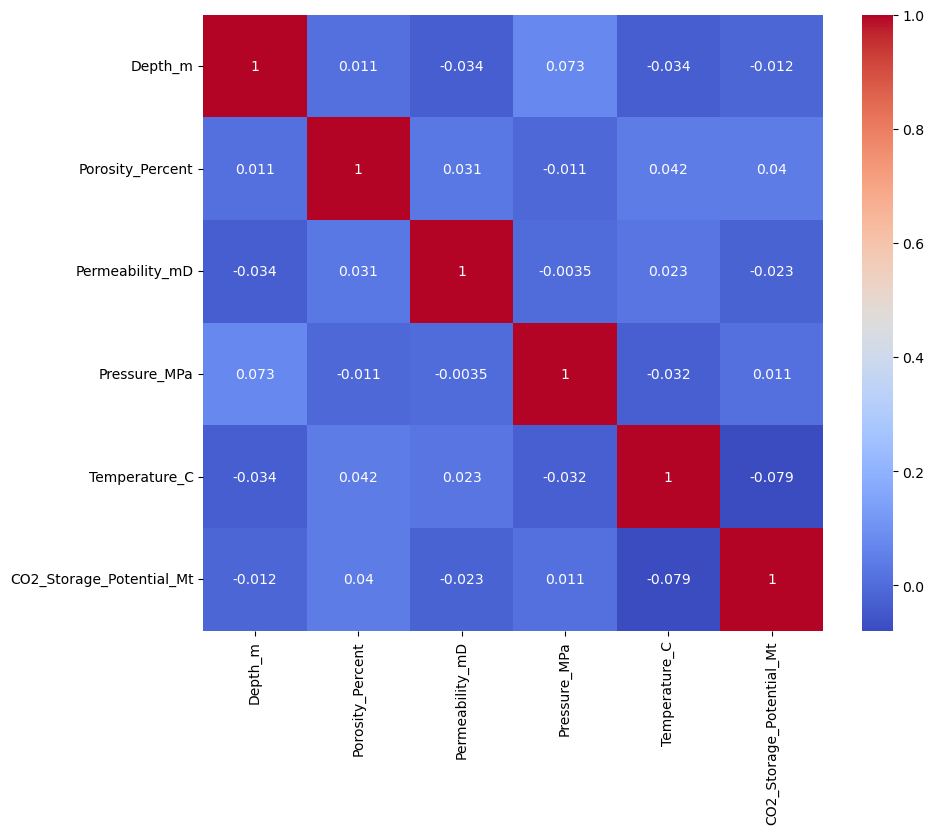

In [5]:
# Check for missing values
df.isnull().sum()

# Statistical summary
df.describe()

# Plot feature distributions
df.hist(bins=20, figsize=(12, 10))

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:


# Split the dataset into features (X) and target (y)
X = df.drop('CO2_Storage_Potential_Mt', axis=1)
y = df['CO2_Storage_Potential_Mt']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Create and fit the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

R-squared: -0.12942311437276932
Root Mean Squared Error: 31.86413683912975


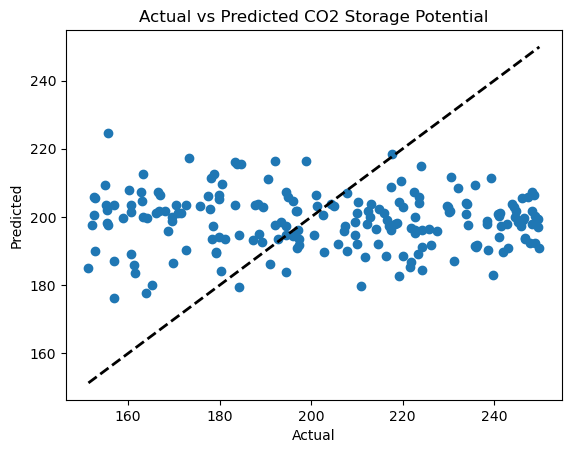

In [12]:
# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted CO2 Storage Potential')
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [15]:
# Make final predictions
final_predictions = best_model.predict(X_test_scaled)

# Evaluate final model
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print(f"Final R-squared: {final_r2}")
print(f"Final Root Mean Squared Error: {final_rmse}")

Final R-squared: -0.07328723224228817
Final Root Mean Squared Error: 31.06217085576941


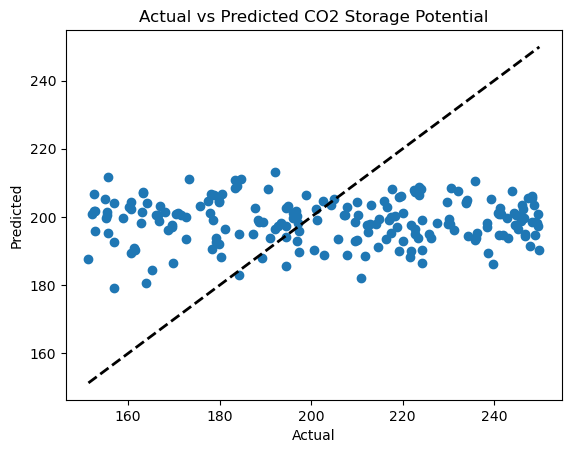

[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=3

In [16]:
# Plot actual vs predicted values
plt.scatter(y_test, final_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted CO2 Storage Potential')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Generate synthetic CO2 plume dataset
time_days = np.arange(0, 1000, 1)
x_position = np.random.uniform(0, 1000, len(time_days))
y_position = np.random.uniform(0, 1000, len(time_days))
z_position = np.linspace(1000, 1200, len(time_days))  # Simulating a gradual rise of the plume
pressure = np.linspace(20, 10, len(time_days))  # Gradual decrease in pressure over time
co2_saturation = np.random.uniform(0, 100, len(time_days))
plume_volume = np.cumsum(np.random.uniform(50, 500, len(time_days)))  # Cumulative plume volume growth

# Create a DataFrame
plume_data = {
    "Time_days": time_days,
    "X_position_m": x_position,
    "Y_position_m": y_position,
    "Z_position_m": z_position,
    "Pressure_MPa": pressure,
    "CO2_Saturation_Percent": co2_saturation,
    "Plume_Volume_m3": plume_volume
}

df_plume = pd.DataFrame(plume_data)

# Save to CSV file
df_plume.to_csv('.csv', index=False)

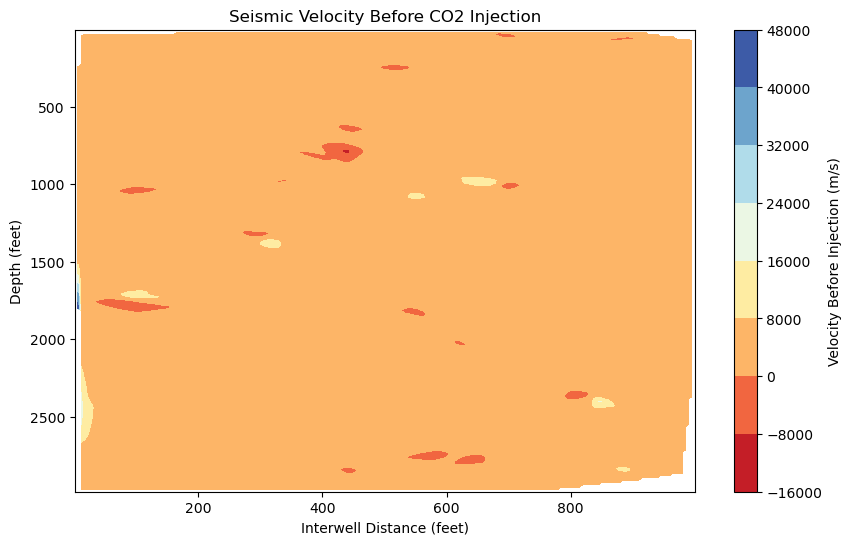

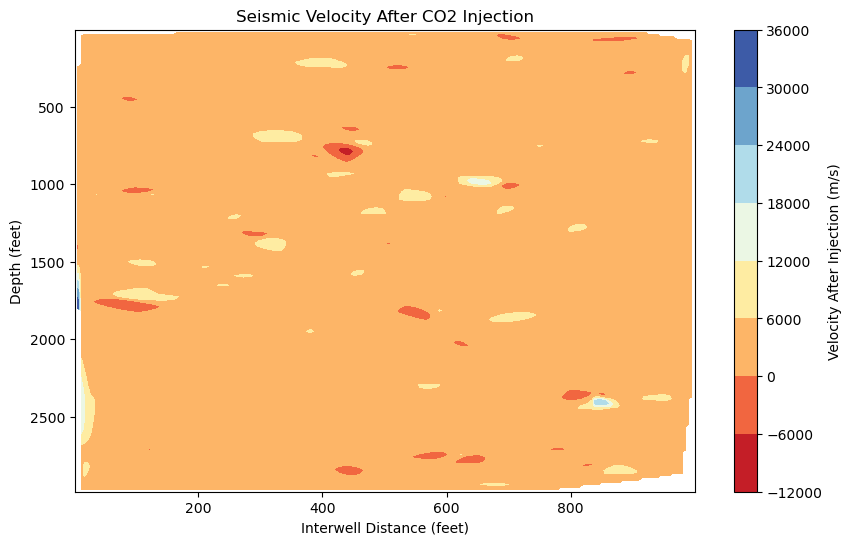

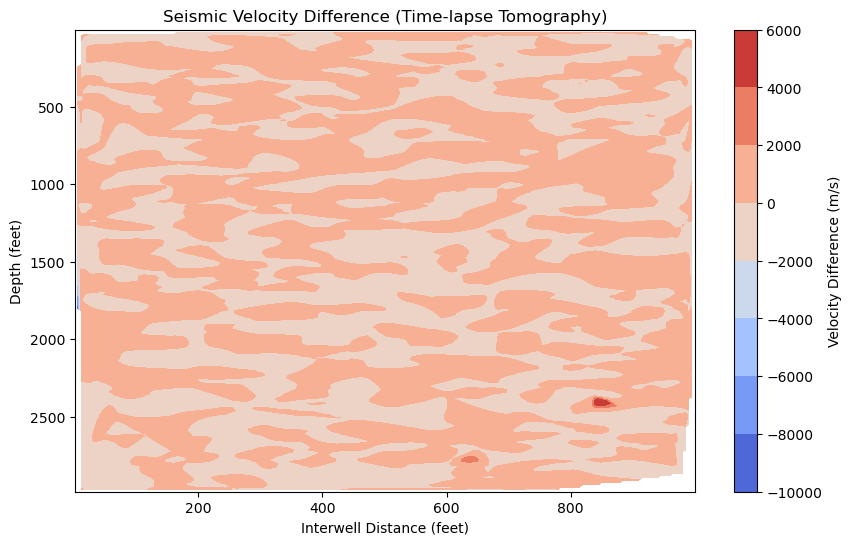

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

# Load the dataset (adjust path and format as needed)
# Assume columns are ['x', 'depth', 'velocity_before', 'velocity_after'] for two profiles
data = pd.read_csv('../stor_cap/tomography_data.csv')

# Split the dataset into two parts, before and after injection
velocity_before = data[['x', 'depth', 'velocity_before']].values
velocity_after = data[['x', 'depth', 'velocity_after']].values

# Set up the grid for interpolation
x_grid = np.linspace(min(data['x']), max(data['x']), 200)
depth_grid = np.linspace(min(data['depth']), max(data['depth']), 200)

# Create a meshgrid for the data points
X, Y = np.meshgrid(x_grid, depth_grid)

# Interpolate the velocity data on a regular grid
vel_before_interp = griddata((velocity_before[:, 0], velocity_before[:, 1]), velocity_before[:, 2], (X, Y), method='cubic')
vel_after_interp = griddata((velocity_after[:, 0], velocity_after[:, 1]), velocity_after[:, 2], (X, Y), method='cubic')

# Calculate the difference in velocity (Time-lapse effect)
velocity_diff = vel_after_interp - vel_before_interp

# Plot the seismic velocity before injection
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, vel_before_interp, cmap='RdYlBu')
plt.colorbar(label='Velocity Before Injection (m/s)')
plt.title('Seismic Velocity Before CO2 Injection')
plt.xlabel('Interwell Distance (feet)')
plt.ylabel('Depth (feet)')
plt.gca().invert_yaxis()
plt.show()

# Plot the seismic velocity after injection
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, vel_after_interp, cmap='RdYlBu')
plt.colorbar(label='Velocity After Injection (m/s)')
plt.title('Seismic Velocity After CO2 Injection')
plt.xlabel('Interwell Distance (feet)')
plt.ylabel('Depth (feet)')
plt.gca().invert_yaxis()
plt.show()

# Plot the velocity difference (time-lapse tomography)
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, velocity_diff, cmap='coolwarm')
plt.colorbar(label='Velocity Difference (m/s)')
plt.title('Seismic Velocity Difference (Time-lapse Tomography)')
plt.xlabel('Interwell Distance (feet)')
plt.ylabel('Depth (feet)')
plt.gca().invert_yaxis()
plt.show()


The provided code is designed to analyze seismic velocity changes before and after CO₂ injection in a reservoir using time-lapse tomography. Here’s a breakdown of the analysis and results based on the dataset:

- Dataset Overview: The dataset includes the following columns:

    - x: Interwell distance (feet) — Horizontal distance between injection wells.
    - depth: Depth (feet) — Vertical depth below the surface.
    - velocity_before: Seismic velocity before CO₂ injection (m/s).
    - velocity_after: Seismic velocity after CO₂ injection (m/s).
  
    The analysis interpolates these data points and visualizes the velocity before and after CO₂ injection, as well as the difference between them.

- Key Steps in the Code: Splitting the Data:

    The dataset is split into two subsets, one containing the seismic velocity before injection and another containing the velocity after injection.

  
    Grid Interpolation:

    The code generates regular grids for x (interwell distance) and depth using interpolation. This allows the scattered data to be interpolated onto a regular grid, which makes contour plotting possible.


  Velocity Difference (Time-lapse Effect):

The difference in seismic velocity between before and after injection is computed, which represents the time-lapse effect caused by the injection of CO₂. This difference is essential to understanding the subsurface changes due to CO₂ injection.

    Plots and Analysis:
    - Plot 1: Seismic Velocity Before CO₂ Injection
    - Description: This plot displays the seismic velocity distribution across the interwell distance and depth before the CO₂ injection.

- Observations:

Areas of higher velocity (blue regions) may indicate denser or less porous rock formations.
Lower velocity regions (red) could suggest more porous or fractured zones, which may be favorable for CO₂ storage.
Plot 2: Seismic Velocity After CO₂ Injection
Description: This plot shows the seismic velocity after the injection of CO₂.
Observations:
Changes in velocity could occur due to the displacement of fluids or the introduction of CO₂ into porous rock formations.
Velocity changes might indicate the extent of CO₂ plume migration in the reservoir.
Plot 3: Seismic Velocity Difference (Time-lapse Tomography)
Description: This plot shows the difference between the velocity before and after injection, highlighting the areas affected by the CO₂ injection.
Observations:
Positive velocity difference (red areas): May indicate an increase in velocity, which could be due to the displacement of gas by CO₂ or changes in pressure.
Negative velocity difference (blue areas): Likely represents regions where CO₂ has permeated the rock, reducing the seismic velocity (possibly due to CO₂ being less dense than the displaced fluid, such as brine).
The extent and pattern of the velocity difference can help determine the distribution and effectiveness of the CO₂ injection.

- Interpretation of Results:
- 
Reservoir Dynamics:

  The velocity difference map (time-lapse tomography) provides valuable information about how CO₂ has affected the reservoir's subsurface structure. Areas where significant changes in velocity are observed may indicate zones where CO₂ has replaced the native fluids, leading to reduced density and, consequently, lower seismic velocity.

  CO₂ Injection Monitoring: The velocity changes offer insights into the migration pattern of the injected CO₂ plume, helping geologists or engineers assess whether the CO₂ is being stored effectively or if there are any potential leaks or bypass zones.
Potential for CO₂ Storage: Low-velocity regions after injection may represent good CO₂ storage zones, as they indicate porous, permeable rock where CO₂ can be trapped over time.

Next Steps and Potential Improvements:

Further Analysis: Analyze specific regions of interest where the velocity difference is most pronounced. This could involve more detailed statistical analysis or simulations to predict the long-term behavior of the CO₂ plume.
Additional Data Layers: Including other geophysical measurements (e.g., pressure, porosity, or permeability) alongside seismic velocity can provide a more comprehensive understanding of the reservoir’s behavior.